# Thermodynamics

## IChO 2023 Training Camp

### Particle distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
%matplotlib inline

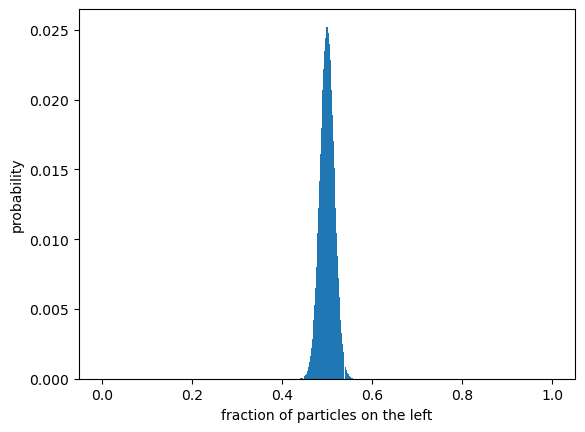

In [12]:
N = 1000 # total number of particles
nvec = np.arange(N+1) # [0, 1, 2, 3, 4]
combinations = binom(N, nvec)/(2**N)
fig, ax = plt.subplots()
ax.bar(nvec/N, combinations, width=1/(N+30));
ax.set_xlabel('fraction of particles on the left');
ax.set_ylabel('probability');

### Low-T solid heat capacity

In [13]:
T1 = np.array([0.09, 0.20, 0.30, 0.40, 0.51])
C1 = np.array([0.16, 0.35, 0.53, 0.72, 0.94])
T2 = np.array([0.5, 1.0, 1.5, 2.0, 2.5])
C2 = np.array([0.66, 5.27, 17.99, 43.58, 87.84])

coefficient of determination: 0.9999334171444195
slope: [3.03473954]
intercept: 1.6750523116965186
prefactor: 5.339074437809759
S =  113.90025467327486  mJ/K/mol


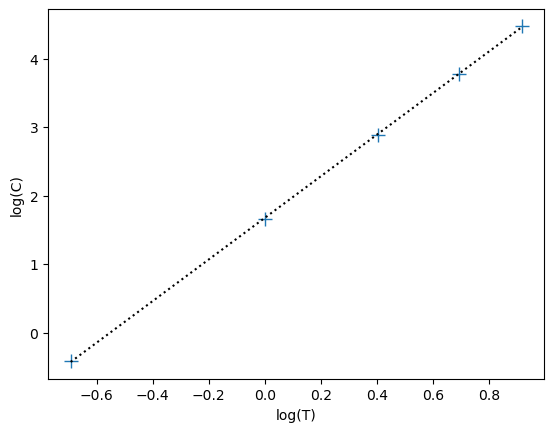

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
T, C = T2, C2  # set to T1, C1  or  T2, C2
x = np.log(T).reshape((-1,1))
y = np.log(C)
model.fit(x,y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"slope: {model.coef_}")
print(f"intercept: {model.intercept_}")
if np.shares_memory(T, T1):
    exp = 1
else:
    exp = 3
k = np.exp(model.intercept_)
print(f"prefactor: {k}")
Tf = 4
print("S = ", k * (Tf**exp) / exp, ' mJ/K/mol')
plt.plot(x, y, '+', ms=10)
Tvec = np.linspace(np.min(np.ravel(x)), np.max(np.ravel(x)), 200)
plt.plot(Tvec, model.intercept_ + model.coef_ * Tvec, 'k:')
plt.xlabel('log(T)')
plt.ylabel('log(C)')
plt.show()